## Introduction

The objective of the assignment is to build a ML model that can predict the online transaction is fraudulent or not. The dataset is obtained from https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/code.

The dataset has nine features and one traget prediction. There are two class labels 0 and 1. The 1 represents the fraudulent transactions and 0 represents the other.
The features of the dataset are:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
 
The feature 'isFlaggedFraud' is invalid and removed from the dataset during pre processing stage.
Since it is a supervised learning binary class classifiaction problem here we used popular classification algorithms like:

1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine
5. Random Forest
6. XGBoost

An ANN model is also created for prediction, it is explained in the deep learning section below.
The major steps in the assignment are listed here, the explanation about them are given in their corresponding sections

1. Loading dataset
2. Feature Engineering:
3. Count Frequency Encoding
4. Balancing the Dataset
5. EDA
6. Feature selection
7. Model creation
8. Deep learning :ANN Model
9. SMOTE
10. ANN


In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from keras.layers.core.dense import Dense
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore")



### Loading the dataset

The dataset is big with 636362620 datapoints, and is uploaded from the PC Drive. Before moving forward with modeling we need to understand the dataset first. The Informantion about the dataset can be found in the following cells.

Initial observations:

There are no null or missing values in the data, but there are three catagorical features which are 'type', 'nameOrig' and 'nameDest'. The class labels are highly imbalanced. Here the majority class is not fraudulent with 6354407 datapoints and the minority is fraudulent transactions which has 8213 datapoints.

In [3]:
# loading the dataset

dataset = pd.read_csv(r"C:\Users\renji\Downloads\archive (2)\PS_20174392719_1491204439457_log.csv")
dataset.shape

(6362620, 11)

In [4]:

dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# checking for null values/ feature types etc

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# checking the class count

dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
# null values

dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Feature Engineering

### Count Frequency Encoding

The count frequency encoding is used to convert the catagorical values of the dataset, here the catagorical values are replaced by its frequency 

In [8]:
# counting the values of the catagorical features / frequency of the catagory in each feature

columns = ['type','nameOrig','nameDest']
sample_dataset = dataset
for col in columns:
    print(col)
    print(dataset[col].value_counts())
    print('\n')
    frequency_count= dataset[col].value_counts().to_dict()
    sample_dataset[col] = dataset[col].map(frequency_count)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64




In [9]:
# Dataset after encoding

sample_dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2151495,9839.64,1,170136.00,160296.36,1,0.00,0.00,0,0
1,1,2151495,1864.28,1,21249.00,19384.72,1,0.00,0.00,0,0
2,1,532909,181.00,1,181.00,0.00,44,0.00,0.00,1,0
3,1,2237500,181.00,1,181.00,0.00,41,21182.00,0.00,1,0
4,1,2151495,11668.14,1,41554.00,29885.86,1,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2237500,339682.13,1,339682.13,0.00,2,0.00,339682.13,1,0
6362616,743,532909,6311409.28,1,6311409.28,0.00,1,0.00,0.00,1,0
6362617,743,2237500,6311409.28,1,6311409.28,0.00,3,68488.84,6379898.11,1,0
6362618,743,532909,850002.52,1,850002.52,0.00,1,0.00,0.00,1,0


### Balancing the Dataset

Since the dataset is highly imbalanced one, with only 0.1% in minority class an under sampling method is used to balance the dataset. In under sampling method the same no of data points from the majority class is randomly choosen in order to match with the minority class.

([<matplotlib.patches.Wedge at 0x244c0fe6e20>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Is Fraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Not Fraud')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.9%'),
  Text(0.599995066874818, -0.002433048680711153, '0.1%')])

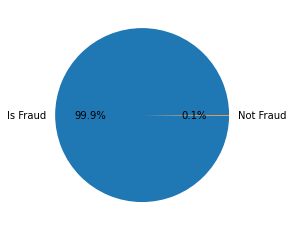

In [10]:
# plotting the class distribution

feature_names = ['Is Fraud','Not Fraud']
feature_count = dataset['isFraud'].value_counts()
plt.pie(feature_count,labels = feature_names,autopct='%1.1f%%')

In [12]:
#balancing the dataset Using RandomUnderSampler function

X = sample_dataset.drop(['isFraud'],axis =1)
y = sample_dataset['isFraud']
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)

X_sampled,y_sampled =  rus.fit_resample(X, y)
X_sampled = pd.DataFrame(X_sampled)
y_sampled = pd.DataFrame(y_sampled)
y_sampled = y_sampled.rename(columns = {0:'isFraud'})

In [14]:
#concantinating both the dataframes

dataset_new = pd.concat([X_sampled, y_sampled], axis=1)
dataset_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,139,2237500,265803.35,1,0.00,0.00,27,751669.39,1017472.74,0,0
1,589,2237500,11278.28,1,0.00,0.00,3,220970.84,232249.12,0,0
2,284,2151495,16363.06,1,35966.16,19603.10,1,0.00,0.00,0,0
3,37,1399284,107223.31,1,20752629.71,20859853.02,35,804594.62,571711.22,0,0
4,287,2151495,3678.25,1,0.00,0.00,1,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16421,743,2237500,339682.13,1,339682.13,0.00,2,0.00,339682.13,0,1
16422,743,532909,6311409.28,1,6311409.28,0.00,1,0.00,0.00,0,1
16423,743,2237500,6311409.28,1,6311409.28,0.00,3,68488.84,6379898.11,0,1
16424,743,532909,850002.52,1,850002.52,0.00,1,0.00,0.00,0,1


In [15]:
#checking the shape of the new dataset

dataset_new['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

([<matplotlib.patches.Wedge at 0x2c43c465d90>,
 [Text(6.735557395310444e-17, 1.1, 'Is Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Not Fraud')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

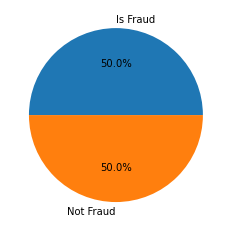

In [12]:
# Visualising the Final Class distribution:

feature_names = ['Is Fraud','Not Fraud']
feature_count = dataset_new['isFraud'].value_counts()
plt.pie(feature_count,labels = feature_names,autopct='%1.1f%%')

### EDA

Exploratory data analysis is done inorder to find out the feature trends and relatations with the target class labels. From the boxplot plotted for each features against class labels, it is clear that the value range for almost all the features are same and there are a lot of outliers/ noises in the data. In order to deal with the outliers we are only choosing the sample dataset for model creation.

The correlation between the different features can be identified using the confusion matrix.There is a high correlation between oldbalancedest and newbalancedest also the namedest feature is correlated to the both with a value of 0.38.

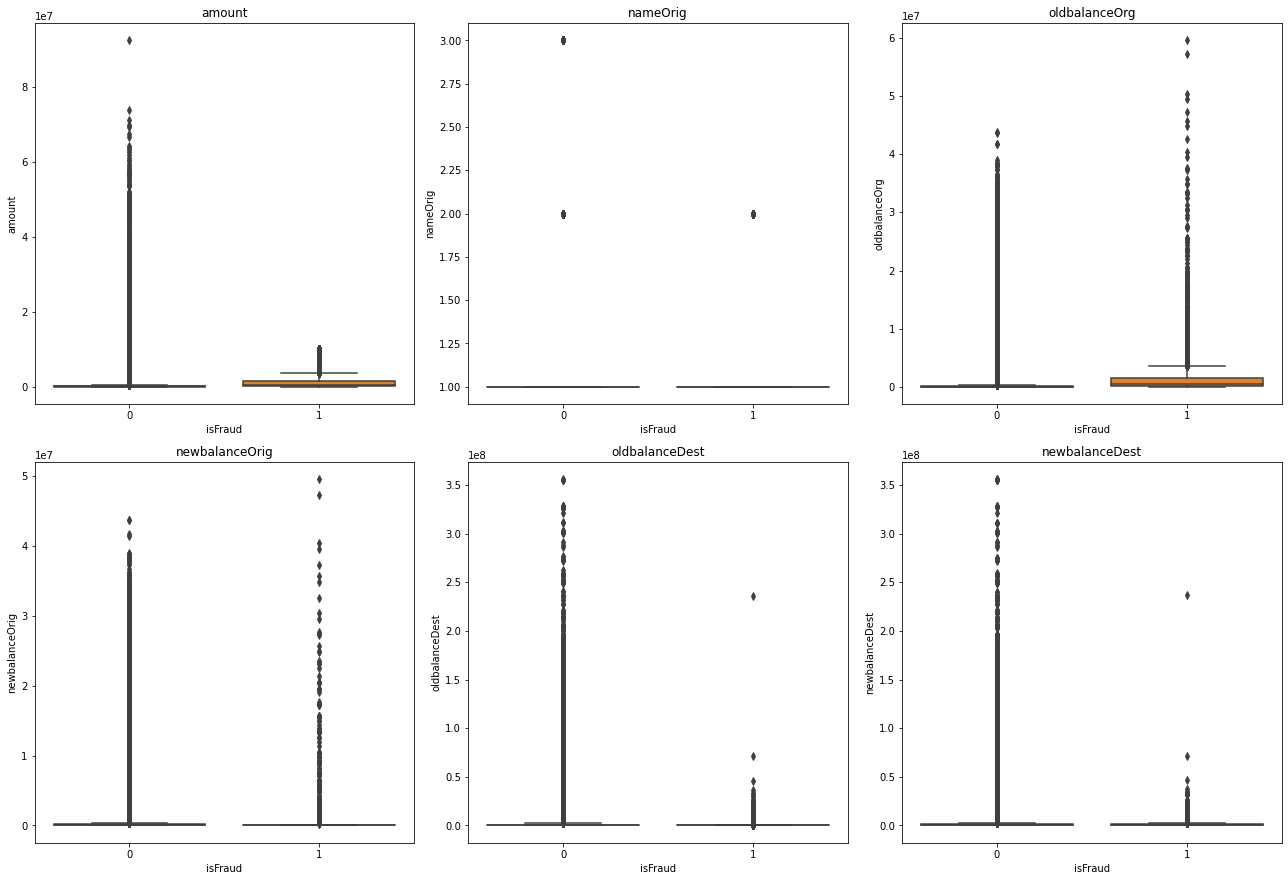

In [16]:
# plotting box plot

col = [ 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

X_data = dataset.drop(['isFraud'], axis=1)
y_data = dataset['isFraud']
plt.figure(figsize = (18,18))
for i,data in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = X_data,y =X_data[data],x = y_data)
    plt.title(data)
plt.tight_layout()
plt.show()

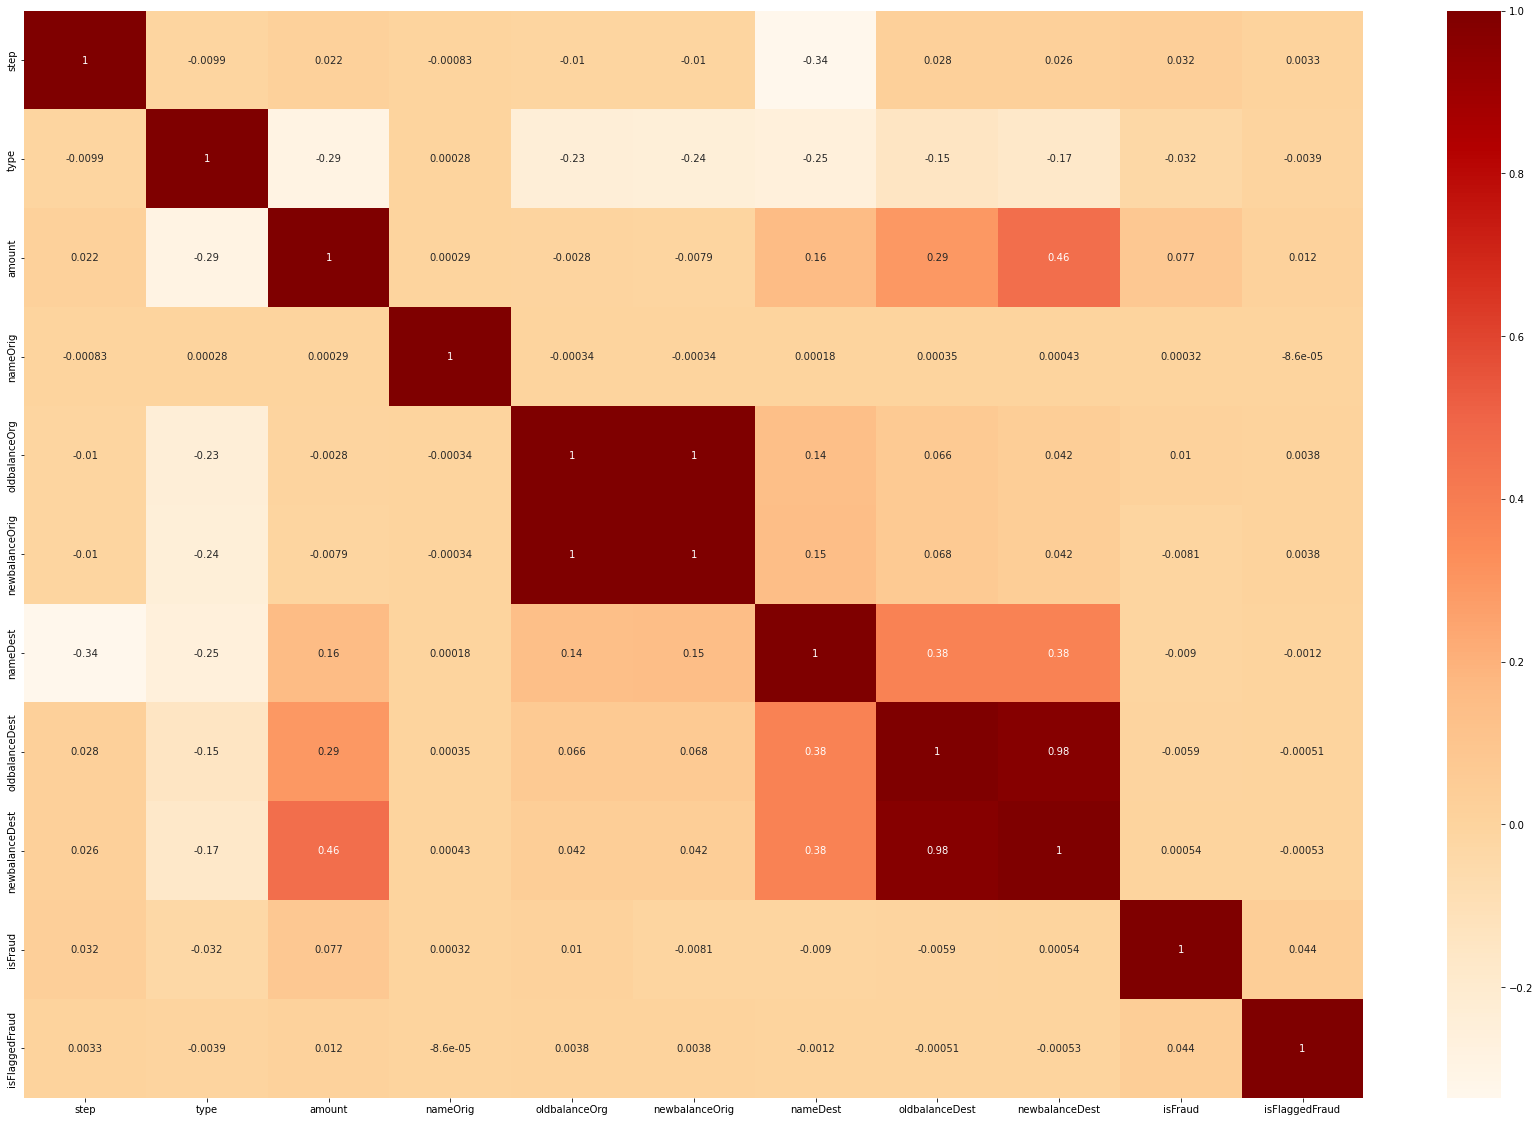

In [16]:
#creating a correlation matrix

plt.figure(figsize=(30,20))
sns.heatmap(dataset.corr(),annot = True,cmap ='OrRd')
plt.show()

###  Feature Selection

Eventhough the no of features is comparitivily low in the dataset, all the features maynot contribute in predicting the output class. In order to find out the weightage of each feature we are using the statistical method called pearson coefficient also known as Pearson's r. It measure the linear correlatin between two sets of data and the value of the pearsonr is in between 1 to -1.

While analysing the values the features 'newbalanceDest','nameOrig' and 'oldbalanceDest' has negligible values ,and removed from the dataset from the next step. Only the 'amount' feature has positive correlation and all others have a negative correlation 

In [19]:
# calculating the pearson coefficent for feature selection

from scipy.stats import pearsonr

x_stat = dataset_new.drop(['isFraud'], axis =1)


for colm in x_stat:
    p = pearsonr(x_stat[colm],dataset_new['isFraud'])
    print(colm, ' : ',p)

step  :  (0.3184760683047988, 0.0)
type  :  (-0.3187877553382862, 0.0)
amount  :  (0.3482763982530742, 0.0)
nameOrig  :  (-0.0010352649191461235, 0.8944515325365938)
oldbalanceOrg  :  (0.12438725309345078, 1.2189762491939608e-57)
newbalanceOrig  :  (-0.1344269421416572, 4.2402953049046006e-67)
nameDest  :  (-0.14174525321341808, 1.8036264182395742e-74)
oldbalanceDest  :  (-0.0725636324358301, 1.2590787272183153e-20)
newbalanceDest  :  (-0.0012630468335892142, 0.8714123021719795)
isFlaggedFraud  :  (0.031225233940085067, 6.264462761076332e-05)


### Model Creation

The dataset is split into training and testing in a 80:20 ratio and for standardising the feature values the StandardScaler function is used. It Standardize features by removing the mean and scaling to unit variance. After scaling, the data is fed into the classifiers. Along with the classifiction algorithms we are using the ensemble models like randomforest and XGBoost. The performance of the models are evaluated using the score metrics. The K-Nearest Neighbors shows the highest accuracy of 91.66% followed by SVM and logistic regression.

The accuracy score, precision and recall values of the K-Nearest Neighbor classifier is displayed using classification_report function. Finally a confusion matrix is shown to understand the classifiaction performence. The FN and FP values are comparatively low for K-Nearest Neighbor classifier. 

In [18]:
# spliting the dataset into training and testing data

X = dataset_new.drop(['isFraud','isFlaggedFraud','newbalanceDest','nameOrig','oldbalanceDest'],axis =1)
y = dataset_new['isFraud']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

# scaling the data

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [20]:
models =  {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "               Support Vector Machine ": SVC(),
    "                         Random Forest": RandomForestClassifier(),                    
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')
}

for clsfr,clsfr_fun in models.items():
    clsfr_fun.fit(X_train_scaled,y_train)

# Evaluating the model

print('Test Score')
for clsfr,clsfr_fun in models.items():
    score = clsfr_fun.score(X_test_scaled,y_test)
    per_score =  (": {:.2f}%". format(score*100))
    print(clsfr, ' : ' ,(per_score))

Test Score
                   Logistic Regression  :  : 90.38%
                   K-Nearest Neighbors  :  : 91.66%
                         Decision Tree  :  : 73.83%
               Support Vector Machine   :  : 91.27%
                         Random Forest  :  : 70.12%
                               XGBoost  :  : 68.35%


In [21]:
#Classification report for KNeighborsClassifier

# Spliting the dataset into traing and testing data

X_train1,X_test1,y_train1,y_test1 =train_test_split(X,y,test_size = 0.2,random_state = 42)

# scaling the independent variables
scalar = StandardScaler()

#scaling the testing and training dataset
scalar.fit(X_train1)
X_train_scaled1 = pd.DataFrame(scalar.transform(X_train1))
scalar.fit(X_test1)
X_test_scaled1 = pd.DataFrame(scalar.transform(X_test1))

print('Test Score')

model = KNeighborsClassifier()
model.fit(X_train_scaled1,y_train1)
prediction1 = model.predict(X_test_scaled1)

score1 = model.score(X_test_scaled1,y_test1)
per_score1 =  (": {:.2f}%". format(score1*100))
print(score1, ' : ' ,(per_score1))
    
print('Classification Report for KNeighborsClassifier : ','\n')
print(classification_report(y_test1,prediction1))

Test Score
0.91661594643944  :  : 91.66%
Classification Report for KNeighborsClassifier :  

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1649
           1       0.92      0.92      0.92      1637

    accuracy                           0.92      3286
   macro avg       0.92      0.92      0.92      3286
weighted avg       0.92      0.92      0.92      3286



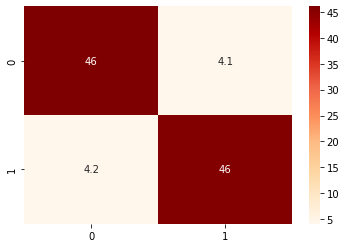

In [22]:
#confusion matrix

con_matrix = confusion_matrix(y_test1,prediction1)
plt.figure(figsize=(6,4))
sns.heatmap((con_matrix/np.sum(con_matrix))*100,annot = True,cmap ="OrRd")
plt.show()

## Deep Learning: ANN Model

 In the last time we have used the undersampling method for balancing the dataset, but here we are using the oversampling method called smote. Since the dataset is large after oversampling we have created a sample dataset for the convenience of computational easiness.
 
 A simple ANN model is created for classification. The model used here is a sequential model with one input and output layers with 3 hidden layers. Since this is a binary classification problem the activation function used here is sigmoid and instead of  classical stochastic gradient descent the optimizer used here is adam, which is also called as adaptive momemt estimation. The cross function applied here is binary cross entropy with a validation split of 0.2.
 
The model is trained for 20 epochs and with a batch size of 10, a learning curve is created at the end to understand the performance of the ANN model.

In [60]:
#importing the libraries

from keras import layers
import tensorflow as tf
from keras.models import Sequential 

### SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique which is used in imbalanced dataset.
First a data point is selected from the minority class and find the nearest neighbours, a datapoint in then created by selecting one of the nearest neighbours in random and drawing a straight line between the two points in feature space.

In [161]:
# over sampling using smote function

smote = SMOTE()
X_ann = sample_dataset.drop(['isFraud'],axis =1)
y_ann = sample_dataset['isFraud']
X_smote,y_smote =  smote.fit_resample(X_ann, y_ann)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote = y_smote.rename(columns = {0:'isFraud'})

dataset_smote = pd.concat([X_smote, y_smote], axis=1)
dataset_smote['isFraud'].value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [ ]:
#sampling the dataset

dataset_ann = dataset_smote.sample(n= 50000)
dataset_ann['isFraud'].value_counts()

In [ ]:
# test train split

X_ann = dataset_ann.drop(['isFraud','isFlaggedFraud'],axis =1)
y_ann = dataset_ann['isFraud']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_ann,y_ann,test_size =0.2,random_state = 42)

In [156]:

# creating the model

model = Sequential()
model.add(layers.Dense (32,activation = 'sigmoid',input_dim = X_train2.shape[1]))
model.add(layers.Dense(64,activation = 'sigmoid'))
model.add(layers.Dense(64,activation = 'sigmoid'))
model.add(layers.Dense(16,activation = 'sigmoid'))
model.add(layers.Dense(1,activation = 'sigmoid'))


In [157]:
#compiling the model

model.compile(optimizer ='adam',loss = 'BinaryCrossentropy',metrics=['BinaryAccuracy'])

In [159]:
#Fitting the model

Ann_model=model.fit(X_train2,y_train2,epochs = 20,batch_size= 10,verbose= 2,validation_split = 0.2)

Epoch 1/20
3200/3200 - 2s - loss: 0.3459 - binary_accuracy: 0.8328 - val_loss: 0.3504 - val_binary_accuracy: 0.8345 - 2s/epoch - 579us/step
Epoch 2/20
3200/3200 - 2s - loss: 0.3457 - binary_accuracy: 0.8329 - val_loss: 0.3502 - val_binary_accuracy: 0.8344 - 2s/epoch - 645us/step
Epoch 3/20
3200/3200 - 2s - loss: 0.3457 - binary_accuracy: 0.8335 - val_loss: 0.3516 - val_binary_accuracy: 0.8344 - 2s/epoch - 754us/step
Epoch 4/20
3200/3200 - 3s - loss: 0.3394 - binary_accuracy: 0.8388 - val_loss: 0.3251 - val_binary_accuracy: 0.8572 - 3s/epoch - 797us/step
Epoch 5/20
3200/3200 - 2s - loss: 0.3382 - binary_accuracy: 0.8407 - val_loss: 0.3455 - val_binary_accuracy: 0.8378 - 2s/epoch - 727us/step
Epoch 6/20
3200/3200 - 2s - loss: 0.3402 - binary_accuracy: 0.8378 - val_loss: 0.3465 - val_binary_accuracy: 0.8379 - 2s/epoch - 734us/step
Epoch 7/20
3200/3200 - 2s - loss: 0.3403 - binary_accuracy: 0.8380 - val_loss: 0.3452 - val_binary_accuracy: 0.8386 - 2s/epoch - 768us/step
Epoch 8/20
3200/3200

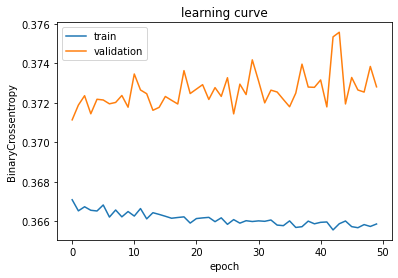

In [160]:
#learning curve

plt.title('learning curve')
plt.xlabel('epoch')
plt.ylabel('BinaryCrossentropy')
plt.plot(a.history['loss'],label = 'train')
plt.plot(a.history['val_loss'],label= 'validation')
plt.legend()
plt.show()

## Results and Conclusions

The aim of the assignment was to build a machine learning model that can classify wheather the online transaction is fraudulent or not, we have used both Classification algorithms and Deep learning models.  The K-Nearest Neighbors shows the highest accuracy of 91.66% followed by SVM and logistic regression.The maximum accuracy we got for the deep learning model is 84%. The decrease in accuracy is due to the imbalance in the dataset, even if we tries different methods like smote and undersampling due to the computaional/ run time complexity we are only working on a small subset of the main dataset. During the run time, we can see that the validation loss is slighty increasing and the accuracy is reducing, which may due to the underfitting of the model. In order to compensate with that an extra hidden layer with 64 neurons were added to the model.

As a suggesion it is better to add more data points in fraudulent class, so that the model train  on the two classes equally and give a better prediction.
